## Web Scraping and Sentiment Analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 35
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    if i%2 != 0 or i == pages:
        print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    if i%5 == 0 or i == pages:
        print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
Scraping page 3
Scraping page 5
   ---> 500 total reviews
Scraping page 7
Scraping page 9
   ---> 1000 total reviews
Scraping page 11
Scraping page 13
Scraping page 15
   ---> 1500 total reviews
Scraping page 17
Scraping page 19
   ---> 2000 total reviews
Scraping page 21
Scraping page 23
Scraping page 25
   ---> 2500 total reviews
Scraping page 27
Scraping page 29
   ---> 3000 total reviews
Scraping page 31
Scraping page 33
Scraping page 35
   ---> 3500 total reviews


In [3]:
df = pd.DataFrame()
df['reviews'] = reviews
print(df.head())

print("\nLength of the dataframe: ", len(df))

                                             reviews
0  ✅ Trip Verified |  \r\nThe worst cabin experie...
1  ✅ Trip Verified | First time flying with Briti...
2  ✅ Trip Verified |  The latest affront. Stood i...
3  Not Verified |  Booked a flight return flight ...
4  ✅ Trip Verified |  I tried to check in on line...

Length of the dataframe:  3500


In [4]:
df.to_csv("data-BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
for row in df['reviews']:
    index = df[df['reviews'] == row].index.values[0]
    if '|' in row:
        df['reviews'][index] = row.split('|')[1].lstrip()
    else:
        df['reviews'][index] = row.lstrip()
#print(df['reviews'][1034].split('|')[1].lstrip())
df.head()

,reviews
0,The worst cabin experience ever: cramped seats...
1,First time flying with British Airways and fir...
2,The latest affront. Stood in first class line ...
3,Booked a flight return flight between London a...
4,I tried to check in on line and was informed t...


In [6]:
df['word_count'] = df['reviews'].apply(lambda x: len(x.split()))

In [7]:
df['char_count'] = df['reviews'].apply(lambda x: len(x))

In [8]:
def average_words(x):
    words = x.split()

    return sum(len(word) for word in words) / len(words)

In [9]:
df['average_word_length'] = df['reviews'].apply(lambda x: average_words(x))

In [10]:
df.head()

,reviews,word_count,char_count,average_word_length
0,The worst cabin experience ever: cramped seats...,47,254,4.404255
1,First time flying with British Airways and fir...,234,1300,4.559829
2,The latest affront. Stood in first class line ...,51,277,4.450980
3,Booked a flight return flight between London a...,189,1086,4.751323
4,I tried to check in on line and was informed t...,68,397,4.852941


In [11]:
from nltk.corpus import stopwords

In [12]:
stop_words = stopwords.words('english')

In [13]:
len(stop_words)

179

In [14]:
df['stopwords_count'] = df['reviews'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

In [15]:
df['stopword_rate'] = df['stopwords_count'] / df['word_count']

In [16]:
df.head()

,reviews,word_count,char_count,average_word_length,stopwords_count,stopword_rate
0,The worst cabin experience ever: cramped seats...,47,254,4.404255,15,0.319149
1,First time flying with British Airways and fir...,234,1300,4.559829,111,0.474359
2,The latest affront. Stood in first class line ...,51,277,4.450980,20,0.392157
3,Booked a flight return flight between London a...,189,1086,4.751323,88,0.465608
4,I tried to check in on line and was informed t...,68,397,4.852941,28,0.411765


In [17]:
df.sort_values(by = 'stopword_rate')

,reviews,word_count,char_count,average_word_length,stopwords_count,stopword_rate
3472,Rating : 10/10 Cabin Flown Economy Value for M...,16,112,6.062500,1,0.062500
3295,Flew Sydney - Singapore - London return. Thoro...,29,183,5.344828,5,0.172414
41,Good lounge at Cape Town. On time departure. D...,23,151,5.608696,4,0.173913
2795,LHR-EZE business class on board B777. Tired ol...,34,223,5.588235,6,0.176471
125,Full afternoon flight. Ready to fly on time. A...,39,238,5.128205,7,0.179487
...,...,...,...,...,...,...
3474,Caught a connection from Gatwick to Jersey and...,68,354,4.220588,41,0.602941
359,I entered the plane with a bunch of white flow...,63,328,4.222222,38,0.603175
2889,Due to a health issue I chose to fly business ...,139,685,3.935252,84,0.604317
2718,I flew out on the 8th June 2015 and all I can ...,71,349,3.915493,44,0.619718


In [18]:
df.describe()

,word_count,char_count,average_word_length,stopwords_count,stopword_rate
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,160.432000,882.991714,4.562289,73.149143,0.444297
std,105.529545,570.634220,0.312626,51.595477,0.058868
min,15.000000,83.000000,3.677083,1.000000,0.062500
25%,86.000000,478.000000,4.347585,37.000000,0.410926
50%,133.000000,739.000000,4.533333,60.000000,0.450549
75%,202.000000,1114.250000,4.736358,94.000000,0.483742
max,654.000000,3529.000000,6.062500,347.000000,0.627907


### Data cleaning

In [19]:
df['reviews']

0       The worst cabin experience ever: cramped seats...
1       First time flying with British Airways and fir...
2       The latest affront. Stood in first class line ...
3       Booked a flight return flight between London a...
4       I tried to check in on line and was informed t...
                              ...                        
3495    Business LHR to BKK. 747-400. First try back w...
3496    This was a bmi Regional operated flight on a R...
3497    LHR-HKG on Boeing 747 - 23/08/12. Much has bee...
3498    Just got back from Bridgetown Barbados flying ...
3499    LHR-JFK-LAX-LHR. Check in was ok apart from be...
Name: reviews, Length: 3500, dtype: object

In [20]:
df['lowercase'] = df['reviews'].apply(lambda x: ' '.join(word.lower() for word in x.split()))

In [21]:
df['punctuation'] = df['lowercase'].str.replace('[^\w\s]', '', regex = True)

In [22]:
df['stopwords'] = df['punctuation'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [23]:
pd.Series(' ' .join(df['stopwords']).split()).value_counts()[:60]

flight         6195
ba             4250
service        2663
seat           2272
food           2272
london         2107
crew           2065
british        2042
airways        2027
seats          2008
good           2008
time           1945
cabin          1912
class          1785
one            1516
staff          1490
business       1489
heathrow       1453
would          1420
economy        1366
get            1238
first          1226
flights        1109
return         1064
club           1037
us             1018
back           1015
plane          1002
lounge          985
passengers      976
hours           974
boarding        953
airline         950
even            902
could           896
new             872
experience      865
check           846
aircraft        830
fly             830
meal            812
told            725
hour            724
like            719
airlines        695
drinks          690
well            684
really          682
better          674
long            659


In [24]:
other_stopwords = ['would', 'one', 'get', 'us', 'back', 'told', 'another', 'could', 'customer', 'even', 'got', 'due', 'however', 'got', 'also', 'quite', 'fly', 'flight', 'flights', 'back', 'seat', 'seats', 'class', 'staff', 'hour', 'passenger', 'time', 'bag', 'drink', 'british airway', 'british airways', 'ba', 'check']

In [25]:
len(other_stopwords)

33

In [26]:
df['cleaned_reviews'] = df['stopwords'].apply(lambda x: ' '.join(word for word in x.split() if word not in other_stopwords))

In [27]:
df['clean_reviews_word_count'] = df['cleaned_reviews'].apply(lambda x: len(x.split()))
df['clean_rate'] = df['clean_reviews_word_count'] / df['word_count']

In [28]:
df.head()

,reviews,word_count,char_count,average_word_length,stopwords_count,stopword_rate,lowercase,punctuation,stopwords,cleaned_reviews,clean_reviews_word_count,clean_rate
0,The worst cabin experience ever: cramped seats...,47,254,4.404255,15,0.319149,the worst cabin experience ever: cramped seats...,the worst cabin experience ever cramped seats ...,worst cabin experience ever cramped seats low ...,worst cabin experience ever cramped low cost s...,24,0.510638
1,First time flying with British Airways and fir...,234,1300,4.559829,111,0.474359,first time flying with british airways and fir...,first time flying with british airways and fir...,first time flying british airways first time f...,first flying british airways first flying amer...,108,0.461538
2,The latest affront. Stood in first class line ...,51,277,4.450980,20,0.392157,the latest affront. stood in first class line ...,the latest affront stood in first class line f...,latest affront stood first class line hour fin...,latest affront stood first line finally go fro...,26,0.509804
3,Booked a flight return flight between London a...,189,1086,4.751323,88,0.465608,booked a flight return flight between london a...,booked a flight return flight between london a...,booked flight return flight london munich 311 ...,booked return london munich 311 317 december r...,84,0.444444
4,I tried to check in on line and was informed t...,68,397,4.852941,28,0.411765,i tried to check in on line and was informed t...,i tried to check in on line and was informed t...,tried check line informed possible given reaso...,tried line informed possible given reason tele...,30,0.441176


### Lemmatization

In [29]:
from textblob import Word

In [30]:
df['lemmatized'] = df['cleaned_reviews'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))

In [31]:
df['lemmatized_word_count'] = df['lemmatized'].apply(lambda x: len(x.split()))

In [32]:
df.head()

,reviews,word_count,char_count,average_word_length,stopwords_count,stopword_rate,lowercase,punctuation,stopwords,cleaned_reviews,clean_reviews_word_count,clean_rate,lemmatized,lemmatized_word_count
0,The worst cabin experience ever: cramped seats...,47,254,4.404255,15,0.319149,the worst cabin experience ever: cramped seats...,the worst cabin experience ever cramped seats ...,worst cabin experience ever cramped seats low ...,worst cabin experience ever cramped low cost s...,24,0.510638,worst cabin experience ever cramped low cost s...,24
1,First time flying with British Airways and fir...,234,1300,4.559829,111,0.474359,first time flying with british airways and fir...,first time flying with british airways and fir...,first time flying british airways first time f...,first flying british airways first flying amer...,108,0.461538,first flying british airway first flying ameri...,108
2,The latest affront. Stood in first class line ...,51,277,4.450980,20,0.392157,the latest affront. stood in first class line ...,the latest affront stood in first class line f...,latest affront stood first class line hour fin...,latest affront stood first line finally go fro...,26,0.509804,latest affront stood first line finally go fro...,26
3,Booked a flight return flight between London a...,189,1086,4.751323,88,0.465608,booked a flight return flight between london a...,booked a flight return flight between london a...,booked flight return flight london munich 311 ...,booked return london munich 311 317 december r...,84,0.444444,booked return london munich 311 317 december r...,84
4,I tried to check in on line and was informed t...,68,397,4.852941,28,0.411765,i tried to check in on line and was informed t...,i tried to check in on line and was informed t...,tried check line informed possible given reaso...,tried line informed possible given reason tele...,30,0.441176,tried line informed possible given reason tele...,30


### Sentiment Analysis

In [33]:
from textblob import TextBlob

In [34]:
df['polarity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[0]) # type: ignore

In [35]:
df['subjectivity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[1]) # type: ignore

In [36]:
df.drop(['lowercase', 'punctuation', 'stopwords', 'lemmatized', 'lemmatized_word_count'], axis = 1, inplace = True)

In [37]:
df.sort_values(by = 'polarity')

,reviews,word_count,char_count,average_word_length,stopwords_count,stopword_rate,cleaned_reviews,clean_reviews_word_count,clean_rate,polarity,subjectivity
804,San Francisco to London. Terrible service and ...,35,211,5.057143,14,0.400000,san francisco london terrible service food cra...,16,0.457143,-0.833333,1.000000
623,Mykonos to London flight delayed and waiting t...,59,311,4.254237,31,0.525424,mykonos london delayed waiting depart prepared...,23,0.389831,-0.766667,0.866667
631,Stockholm to London. Worst business class flig...,38,222,4.842105,19,0.500000,stockholm london worst business flown split se...,16,0.421053,-0.650000,0.783333
232,The food was awful. An over night early mornin...,38,229,5.052632,15,0.394737,food awful night early morning started offer t...,21,0.552632,-0.642857,0.857143
792,Miami to London. The breakfast served just bef...,37,219,4.945946,17,0.459459,miami london breakfast served landing terrible...,20,0.540541,-0.622917,0.635417
...,...,...,...,...,...,...,...,...,...,...,...
115,Good flight apart from my seat fabric was comi...,37,215,4.837838,13,0.351351,good apart fabric coming apart on39j lack good...,21,0.567568,0.700000,0.600000
506,Gatwick to St Lucia. Great service on this fli...,23,129,4.652174,9,0.391304,gatwick st lucia great service thank much cabi...,13,0.565217,0.700000,0.675000
1920,London Heathrow to Dublin. On time departure a...,52,321,5.192308,19,0.365385,london heathrow dublin departure arrival good ...,26,0.500000,0.700000,0.600000
584,Edinburgh to Kuala Lumpur via London. I have j...,89,470,4.280899,42,0.471910,edinburgh kuala lumpur via london returned kl ...,43,0.483146,0.716667,0.625000


In [38]:
df.describe()

,word_count,char_count,average_word_length,stopwords_count,stopword_rate,clean_reviews_word_count,clean_rate,polarity,subjectivity
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,160.432000,882.991714,4.562289,73.149143,0.444297,74.736000,0.476365,0.096534,0.481962
std,105.529545,570.634220,0.312626,51.595477,0.058868,47.355327,0.060619,0.190402,0.117573
min,15.000000,83.000000,3.677083,1.000000,0.062500,6.000000,0.259259,-0.833333,0.000000
25%,86.000000,478.000000,4.347585,37.000000,0.410926,41.000000,0.435811,-0.022619,0.412223
50%,133.000000,739.000000,4.533333,60.000000,0.450549,63.000000,0.471309,0.094032,0.484297
75%,202.000000,1114.250000,4.736358,94.000000,0.483742,94.000000,0.512275,0.216667,0.552363
max,654.000000,3529.000000,6.062500,347.000000,0.627907,348.000000,0.782609,0.800000,1.000000


#### Wordcloud

In [39]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [40]:
import seaborn as sns
sns.set_theme(style = 'whitegrid')

In [41]:
df['score'] = 0

df.loc[df.polarity <= -0.8, 'score'] = 1
df.loc[(df.polarity <= -0.6) & (df.polarity > -0.8), 'score'] = 2
df.loc[(df.polarity <= -0.4) & (df.polarity > -0.6), 'score'] = 3
df.loc[(df.polarity <= -0.2) & (df.polarity > -0.4), 'score'] = 4
df.loc[(df.polarity <= 0) & (df.polarity > -0.2), 'score'] = 5
df.loc[(df.polarity <= 0.2) & (df.polarity > 0), 'score'] = 6
df.loc[(df.polarity <= 0.4) & (df.polarity > 0.2), 'score'] = 7
df.loc[(df.polarity <= 0.6) & (df.polarity > 0.4), 'score'] = 8
df.loc[(df.polarity <= 0.8) & (df.polarity > 0.6), 'score'] = 9
df.loc[df.polarity > 0.8, 'score'] = 10

In [42]:
df.describe()

,word_count,char_count,average_word_length,stopwords_count,stopword_rate,clean_reviews_word_count,clean_rate,polarity,subjectivity,score
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,160.432000,882.991714,4.562289,73.149143,0.444297,74.736000,0.476365,0.096534,0.481962,5.976286
std,105.529545,570.634220,0.312626,51.595477,0.058868,47.355327,0.060619,0.190402,0.117573,1.002003
min,15.000000,83.000000,3.677083,1.000000,0.062500,6.000000,0.259259,-0.833333,0.000000,1.000000
25%,86.000000,478.000000,4.347585,37.000000,0.410926,41.000000,0.435811,-0.022619,0.412223,5.000000
50%,133.000000,739.000000,4.533333,60.000000,0.450549,63.000000,0.471309,0.094032,0.484297,6.000000
75%,202.000000,1114.250000,4.736358,94.000000,0.483742,94.000000,0.512275,0.216667,0.552363,7.000000
max,654.000000,3529.000000,6.062500,347.000000,0.627907,348.000000,0.782609,0.800000,1.000000,9.000000


[Text(0.5, 0, 'Score'), Text(0, 0.5, 'Number of reviews')]

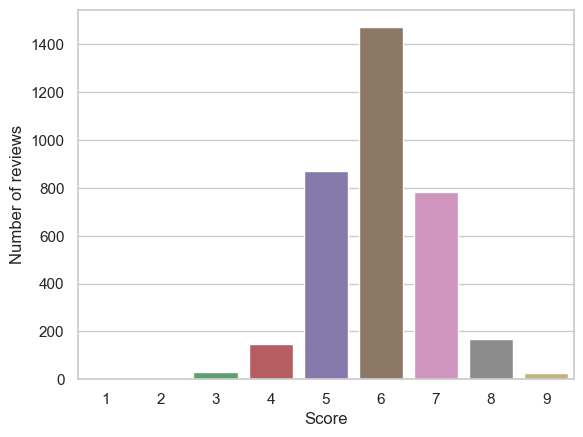

In [48]:
graph = sns.countplot(data = df, x = 'score')
graph.set(xlabel = 'Score', ylabel = 'Number of reviews')

In [44]:
review = df

review.dropna(inplace = True)

In [45]:
score_1 = review[review['score'] == 1]
score_2 = review[review['score'] == 2]
score_3 = review[review['score'] == 3]
score_4 = review[review['score'] == 4]
score_5 = review[review['score'] == 5]
score_6 = review[review['score'] == 6]
score_7 = review[review['score'] == 7]
score_8 = review[review['score'] == 9]
score_9 = review[review['score'] == 8]
score_10 = review[review['score'] == 10]

In [46]:
review_sample = pd.concat([score_1, score_2, score_3, score_4, score_5,score_6, score_7, score_8, score_9, score_10], axis = 0)
review_sample.reset_index(drop = True, inplace = True)

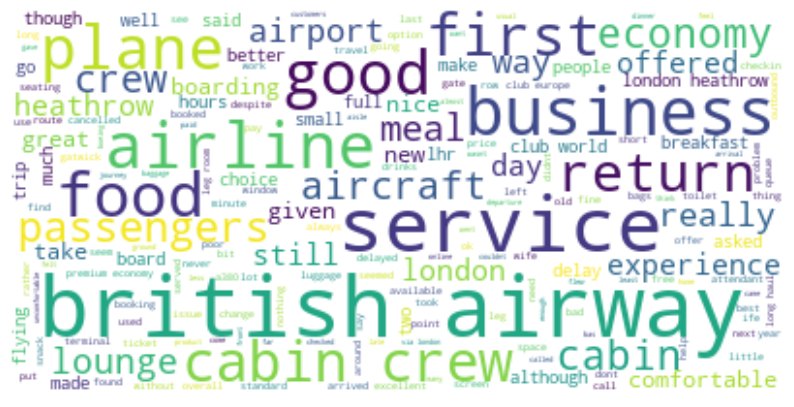

In [47]:
review_str = review_sample.cleaned_reviews.str.cat()
wordcloud = WordCloud(background_color = 'white').generate(review_str)

plt.figure (figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()